# Wydatki na kulturę i edukację w stosunku do dochodów

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
PATH = "ludnosc.csv"
df_ludnosc = pd.read_csv(PATH, sep = ';', decimal = ',')

df_ludnosc.pop("Unnamed: 8")
indexes = df_ludnosc[df_ludnosc.Rok == 1998].index
df_ludnosc.drop(indexes, inplace=True)
region = df_ludnosc.Nazwa.unique()
rok = df_ludnosc.Rok.unique()

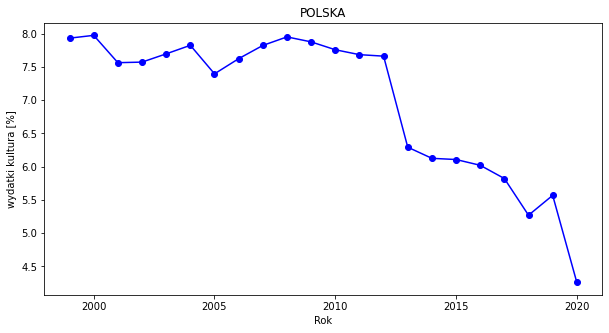

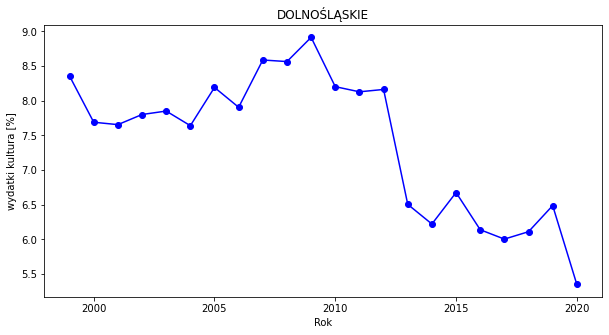

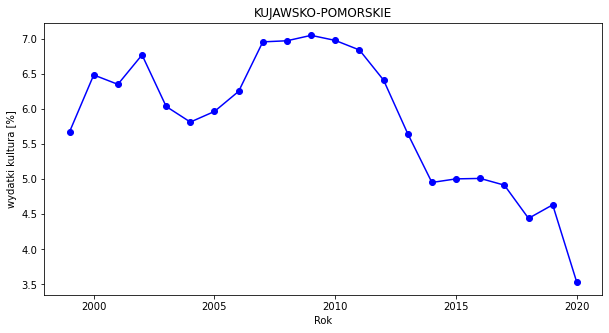

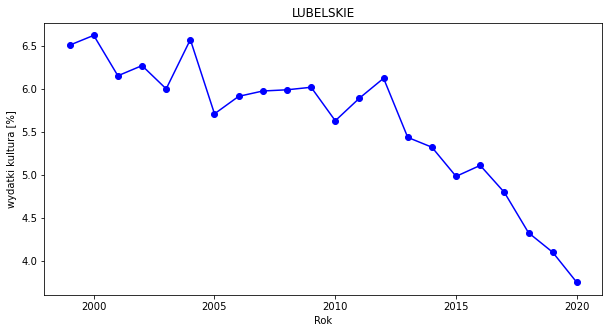

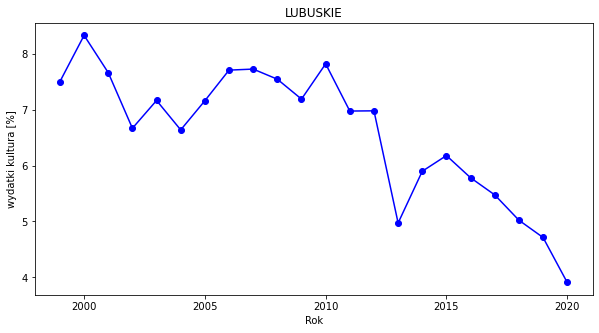

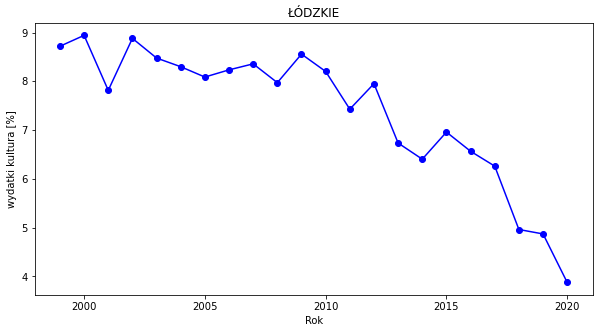

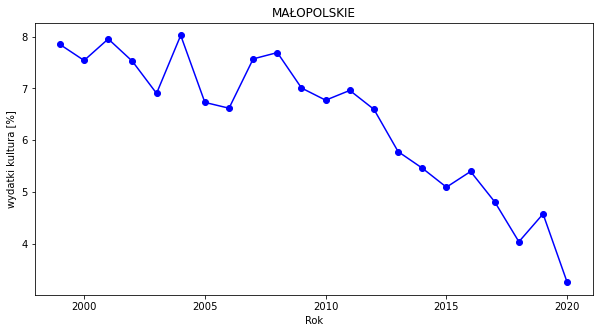

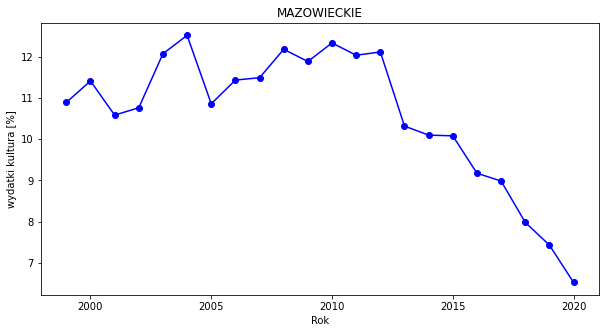

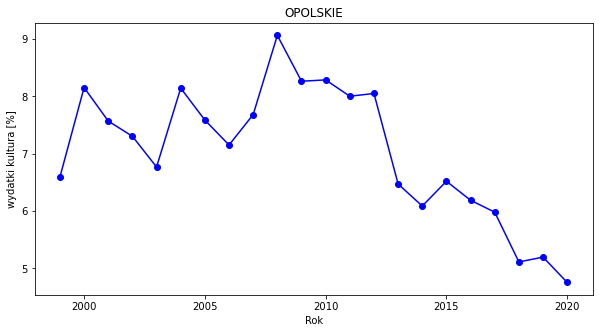

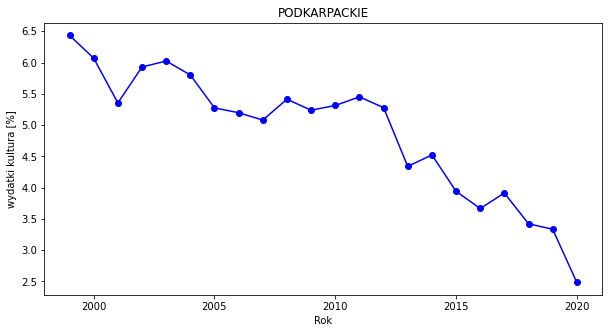

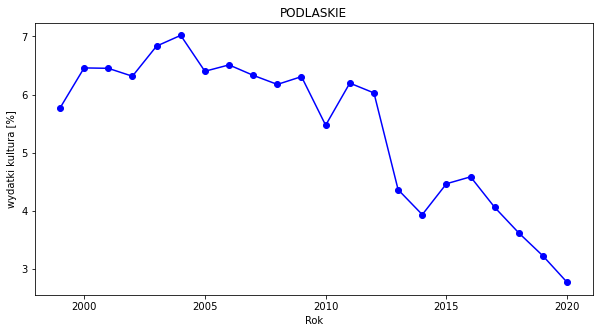

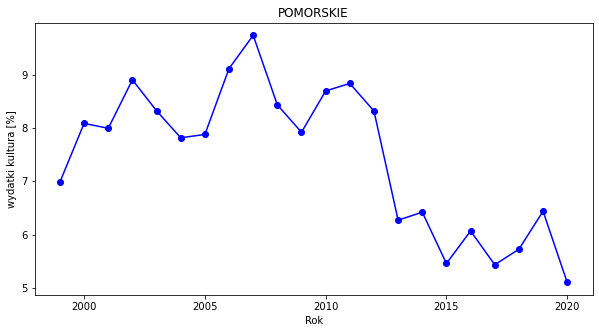

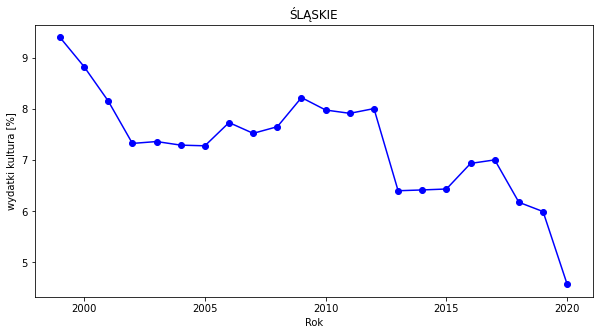

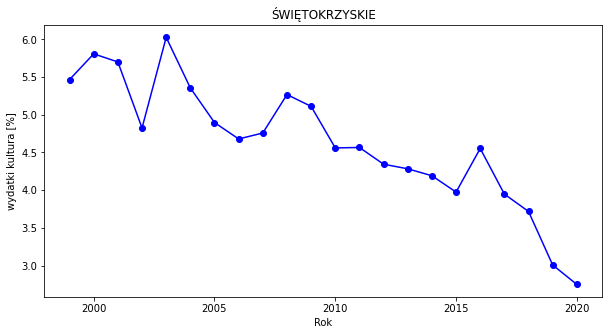

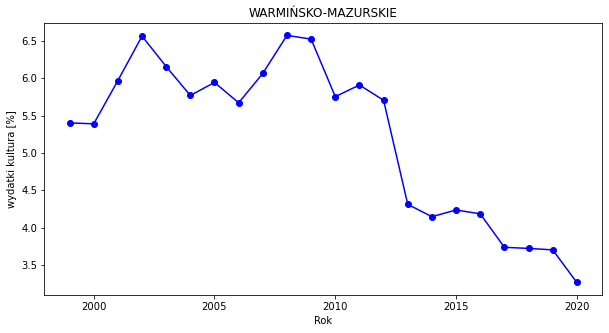

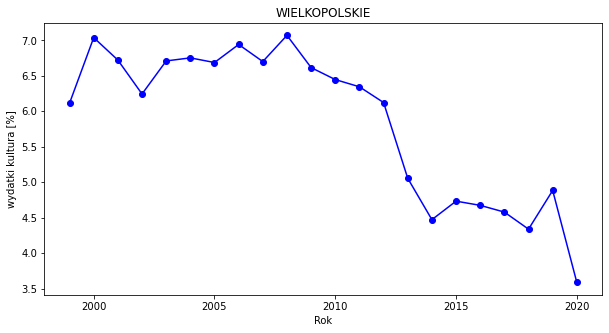

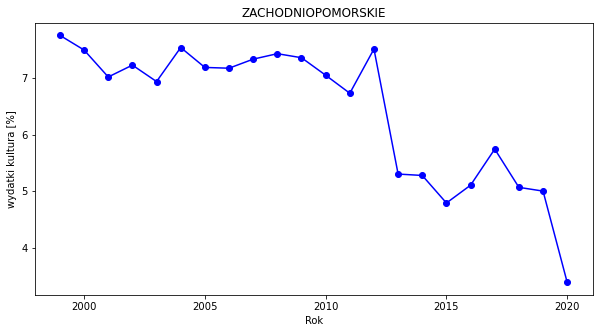

In [4]:
dochody_ogolem = df_ludnosc[(df_ludnosc.Kategoria == "Dochody") & (df_ludnosc.Zmienna == "ogółem") & (df_ludnosc.Nazwa == "POLSKA")].Wartosc.values
for r in region:
    wydatki_edukacja = df_ludnosc[(df_ludnosc.Kategoria == "Wydatki") & (df_ludnosc.Zmienna == "edukacja") & (df_ludnosc.Nazwa == r)].Wartosc.values
    wydatki_kultura= df_ludnosc[(df_ludnosc.Kategoria == "Wydatki") & (df_ludnosc.Zmienna == "rekreacja i kultura") & (df_ludnosc.Nazwa == r)].Wartosc.values
    wydatki_combined = []
    for wydatek in range (0, len(wydatki_kultura)):
        wydatki_combined.append(wydatki_kultura[wydatek]+wydatki_edukacja[wydatek])
    stosunek_edu_kult_vs_dochody = []
    for suma_wydatkow in range (0, len(wydatki_combined)):
        stosunek_edu_kult_vs_dochody.append(wydatki_combined[suma_wydatkow]/dochody_ogolem[suma_wydatkow])
        stosunek_edu_kult_vs_dochody[suma_wydatkow]*=100
    plt.figure(figsize=(10,5))
    plt.plot(rok, stosunek_edu_kult_vs_dochody, 'o-b')
    plt.xlabel('Rok')
    plt.ylabel('wydatki kultura [%]')
    plt.title(f'{r}')
    plt.show()